# Global heating based on TIEGCM

In [2]:
import sys
sys.path.insert(1, "../SourceCode")
import DaedalusGlobals as DaedalusGlobals
from ipywidgets import*
import ipywidgets as widgets
from netCDF4 import Dataset
import plotly.graph_objects as go
from mpl_toolkits.basemap import Basemap, shiftgrid, addcyclic
import numpy as np
from mpl_toolkits.basemap import Basemap, shiftgrid, addcyclic
import matplotlib.pyplot as plt
import datetime
import time

### Allocations

In [2]:


QJ_GLOB=[]
QA_GLOB=[]
QW_GLOB=[]
QDTIN_GLOB=[]
QFTIN_GLOB=[]
QDTEN_GLOB=[]
QDTIE_GLOB=[]
maplat=[]
maplon=[]
maptime=[]

### Read data

In [3]:
for i in range(1,16):
    QJ_temp_lat=np.zeros((24,80, 72, 144),order='F')
    QJ_h_lat=np.zeros((24,80,144),order='F')
    QJ_temp_lon=np.zeros((24,80, 144),order='F')
    QJ_h_lon=np.zeros((24,80),order='F')
    QJ_temp_lev=np.zeros((24,80),order='F')

    QA_temp_lat=np.zeros((24,80, 72, 144),order='F')
    QA_h_lat=np.zeros((24,80,144),order='F')
    QA_temp_lon=np.zeros((24,80, 144),order='F')
    QA_h_lon=np.zeros((24,80),order='F')
    QA_temp_lev=np.zeros((24,80),order='F')

    QW_temp_lat=np.zeros((24,80, 72, 144),order='F')
    QW_h_lat=np.zeros((24,80,144),order='F')
    QW_temp_lon=np.zeros((24,80, 144),order='F')
    QW_h_lon=np.zeros((24,80),order='F')
    QW_temp_lev=np.zeros((24,80),order='F')

    QDTIN_temp_lat=np.zeros((24,80, 72, 144),order='F')
    QDTIN_h_lat=np.zeros((24,80,144),order='F')
    QDTIN_temp_lon=np.zeros((24,80, 144),order='F')
    QDTIN_h_lon=np.zeros((24,80),order='F')
    QDTIN_temp_lev=np.zeros((24,80),order='F')

    QDTIE_temp_lat=np.zeros((24,80, 72, 144),order='F')
    QDTIE_h_lat=np.zeros((24,80,144),order='F')
    QDTIE_temp_lon=np.zeros((24,80, 144),order='F')
    QDTIE_h_lon=np.zeros((24,80),order='F')
    QDTIE_temp_lev=np.zeros((24,80),order='F')

    QDTEN_temp_lat=np.zeros((24,80, 72, 144),order='F')
    QDTEN_h_lat=np.zeros((24,80,144),order='F')
    QDTEN_temp_lon=np.zeros((24,80, 144),order='F')
    QDTEN_h_lon=np.zeros((24,80),order='F')
    QDTEN_temp_lev=np.zeros((24,80),order='F')

    QFTIN_temp_lat=np.zeros((24,80, 72, 144),order='F')
    QFTIN_h_lat=np.zeros((24,80,144),order='F')
    QFTIN_temp_lon=np.zeros((24,80, 144),order='F')
    QFTIN_h_lon=np.zeros((24,80),order='F')
    QFTIN_temp_lev=np.zeros((24,80),order='F')

    TIEGCM = Dataset(DaedalusGlobals.TIEGCM_Files_Path +"TIEGCM_EVT1_2015_StPatricksDay_Rerun/tiegcm_dres.s_mar2015_amie_v1_0%d_Rerun.nc" %i)
    TIEGCM2 =Dataset(DaedalusGlobals.TIEGCM_Files_Path +"TIEGCM_EVT1_2015_StPatricksDay_Rerun/%d.nc" %i)


    glat = TIEGCM.variables['lat'][:] #geographic latitude in deg
    glon = TIEGCM.variables['lon'][:] #geographic longitude in deg
    gtime=TIEGCM.variables['time'][:] #geographic longitude in deg
    # Get data from TIEGCM Model file
    QJTOT = TIEGCM2.variables['QJH_TOT'][:] 
    QAMIE_TOT = TIEGCM2.variables['QAMIE'][:] 
    QWIND_TOT = TIEGCM2.variables['QWIND'][:] 
    QDTIN_TOT = TIEGCM2.variables['qDTin'][:] 
    QFTIN_TOT = TIEGCM2.variables['qFin'][:] 
    QDTEN_TOT = TIEGCM2.variables['qDTen'][:] 
    QDTIE_TOT = TIEGCM2.variables['qDTei'][:] 
    print(gtime)
    
    z_alt=np.arange(100,500,5)

    for timer in range(0,24):
        for lev in range(0, len(z_alt)):
            for lat in range(50, len(glat)-1):
                for lon in range(0, len(glon)):

                    QJ=((QJTOT[timer,lev,lat,lon]+QJTOT[timer,lev,lat+1,lon])/2)/1000
                    QA=((QAMIE_TOT[timer,lev,lat,lon]+QAMIE_TOT[timer,lev,lat+1,lon])/2)/1000
                    QW=((QWIND_TOT[timer,lev,lat,lon]+QWIND_TOT[timer,lev,lat+1,lon])/2)/1000
                    QDTIN=((QDTIN_TOT[timer,lev,lat,lon]+QDTIN_TOT[timer,lev,lat+1,lon])/2)/1000
                    QDTEN=((QDTEN_TOT[timer,lev,lat,lon]+QDTEN_TOT[timer,lev,lat+1,lon])/2)/1000
                    QDTIE=((QDTIE_TOT[timer,lev,lat,lon]+QDTIE_TOT[timer,lev,lat+1,lon])/2)/1000                
                    QFTIN=((QFTIN_TOT[timer,lev,lat,lon]+QFTIN_TOT[timer,lev,lat+1,lon])/2)/1000
                    radius=(6370+z_alt[lev])*1000 #radius in meters
                    dlat=(2.5*np.pi)/180
                    delta_z=radius*dlat #m
                    QJOULE_T=QJ*delta_z
                    QAMIE_T=QA*delta_z
                    QWIND_T=QW*delta_z
                    QDTIN_T=QDTIN*delta_z
                    QDTEN_T=QDTEN*delta_z
                    QDTIE_T=QDTIE*delta_z
                    QFTIN_T=QFTIN*delta_z
                    QJ_temp_lat[timer,lev,lat,lon]=QJOULE_T
                    QA_temp_lat[timer,lev,lat,lon]=QAMIE_T
                    QW_temp_lat[timer,lev,lat,lon]=QWIND_T
                    QDTIN_temp_lat[timer,lev,lat,lon]=QDTIN_T
                    QDTEN_temp_lat[timer,lev,lat,lon]=QDTEN_T
                    QDTIE_temp_lat[timer,lev,lat,lon]=QDTIE_T
                    QFTIN_temp_lat[timer,lev,lat,lon]=QFTIN_T
                    
#                     print(QJ,QJOULE_T)

    #sum over latitudes
    for timer in range(0,24):
        for lev in range(0, len(z_alt)):
                for lon in range(0, len(glon)):

                    QJ_h_lat[timer,lev,lon]=np.sum(QJ_temp_lat[timer,lev,:,lon])
                    QA_h_lat[timer,lev,lon]=np.sum(QA_temp_lat[timer,lev,:,lon])
                    QW_h_lat[timer,lev,lon]=np.sum(QW_temp_lat[timer,lev,:,lon])
                    QDTIN_h_lat[timer,lev,lon]=np.sum(QDTIN_temp_lat[timer,lev,:,lon])
                    QDTIE_h_lat[timer,lev,lon]=np.sum(QDTIE_temp_lat[timer,lev,:,lon])
                    QDTEN_h_lat[timer,lev,lon]=np.sum(QDTEN_temp_lat[timer,lev,:,lon])
                    QFTIN_h_lat[timer,lev,lon]=np.sum(QFTIN_temp_lat[timer,lev,:,lon])
                    # warnings.simplefilter('ignore')
                    

    for timer in range(0,24):
        for lev in range(0, 80):
                for lon in range(0, 143):
                    QJLON=(QJ_h_lat[timer,lev,lon]+QJ_h_lat[timer,lev,lon+1])/2
                    QALON=(QA_h_lat[timer,lev,lon]+QA_h_lat[timer,lev,lon+1])/2
                    QWLON=(QW_h_lat[timer,lev,lon]+QW_h_lat[timer,lev,lon+1])/2
                    QDTINLON=(QDTIN_h_lat[timer,lev,lon]+QDTIN_h_lat[timer,lev,lon+1])/2
                    QDTIELON=(QDTIE_h_lat[timer,lev,lon]+QDTIE_h_lat[timer,lev,lon+1])/2
                    QDTENLON=(QDTEN_h_lat[timer,lev,lon]+QDTEN_h_lat[timer,lev,lon+1])/2
                    QFTINLON=(QFTIN_h_lat[timer,lev,lon]+QFTIN_h_lat[timer,lev,lon+1])/2
                    radius=(6370+z_alt[lev])*1000 #radius in meters
                    dlon=(2.5*np.pi)/180
                    delta_z=radius*dlon #m
                    QJOULE_Tl=QJLON*delta_z
                    QJ_temp_lon[timer,lev,lon]=QJOULE_Tl
                    QAMIE_Tl=QALON*delta_z
                    QA_temp_lon[timer,lev,lon]=QAMIE_Tl
                    QWIND_Tl=QWLON*delta_z
                    QW_temp_lon[timer,lev,lon]=QWIND_Tl
                    QDTIN_Tl=QDTINLON*delta_z
                    QDTIN_temp_lon[timer,lev,lon]=QDTIN_Tl
                    QDTIE_Tl=QDTIELON*delta_z
                    QDTIE_temp_lon[timer,lev,lon]=QDTIE_Tl
                    QDTEN_Tl=QDTENLON*delta_z
                    QDTEN_temp_lon[timer,lev,lon]=QDTEN_Tl
                    QFTIN_Tl=QFTINLON*delta_z
                    QFTIN_temp_lon[timer,lev,lon]=QFTIN_Tl
    #sum over longitudes
    for timer in range(0,24):            
        for lev in range(0, 80):
            QJ_h_lon[timer,lev]=np.sum(QJ_temp_lon[timer,lev,:])
            QA_h_lon[timer,lev]=np.sum(QA_temp_lon[timer,lev,:])
            QW_h_lon[timer,lev]=np.sum(QW_temp_lon[timer,lev,:])
            QDTIN_h_lon[timer,lev]=np.sum(QDTIN_temp_lon[timer,lev,:])
            QDTIE_h_lon[timer,lev]=np.sum(QDTIE_temp_lon[timer,lev,:])
            QDTEN_h_lon[timer,lev]=np.sum(QDTEN_temp_lon[timer,lev,:])
            QFTIN_h_lon[timer,lev]=np.sum(QFTIN_temp_lon[timer,lev,:])
    for timer in range(0,24):
        for lev in range(0,80-1):
            QJLEV=(QJ_h_lon[timer,lev]+QJ_h_lon[timer,lev+1])/2
            QALEV=(QA_h_lon[timer,lev]+QA_h_lon[timer,lev+1])/2
            QWLEV=(QW_h_lon[timer,lev]+QW_h_lon[timer,lev+1])/2
            QDTINLEV=(QDTIN_h_lon[timer,lev]+QDTIN_h_lon[timer,lev+1])/2
            QDTIELEV=(QDTIE_h_lon[timer,lev]+QDTIE_h_lon[timer,lev+1])/2
            QDTENLEV=(QDTEN_h_lon[timer,lev]+QDTEN_h_lon[timer,lev+1])/2
            QFTINLEV=(QFTIN_h_lon[timer,lev]+QFTIN_h_lon[timer,lev+1])/2        
            delta_z=5000 #1km dalt
            QJ_temp_levd2=QJLEV*delta_z
            QJ_temp_lev[timer,lev]=QJ_temp_levd2
            QA_temp_levd2=QALEV*delta_z
            QA_temp_lev[timer,lev]=QA_temp_levd2
            QW_temp_levd2=QWLEV*delta_z
            QW_temp_lev[timer,lev]=QW_temp_levd2
            QDTIN_temp_levd2=QDTINLEV*delta_z
            QDTIN_temp_lev[timer,lev]=QDTIN_temp_levd2 
            QDTIE_temp_levd2=QDTIELEV*delta_z
            QDTIE_temp_lev[timer,lev]=QDTIE_temp_levd2 
            QDTEN_temp_levd2=QDTENLEV*delta_z
            QDTEN_temp_lev[timer,lev]=QDTEN_temp_levd2 
            QFTIN_temp_levd2=QFTINLEV*delta_z
            QFTIN_temp_lev[timer,lev]=QFTIN_temp_levd2     
            print(timer,lev)

    for timer in range(0,24):
        QJ_global=np.sum(QJ_temp_lev[timer,:])
        QJ_GLOB.append(QJ_global/(10**9))
        QA_global=np.sum(QA_temp_lev[timer,:])
        QA_GLOB.append(QA_global/(10**9))
        QW_global=np.sum(QW_temp_lev[timer,:])
        QW_GLOB.append(QW_global/(10**9))
        QDTIN_global=np.sum(QDTIN_temp_lev[timer,:])
        QDTIN_GLOB.append(QDTIN_global/(10**9))
        QDTIE_global=np.sum(QDTIE_temp_lev[timer,:])
        QDTIE_GLOB.append(QDTIE_global/(10**9))
        QDTEN_global=np.sum(QDTEN_temp_lev[timer,:])
        QDTEN_GLOB.append(QDTEN_global/(10**9))
        QFTIN_global=np.sum(QFTIN_temp_lev[timer,:])
        QFTIN_GLOB.append(QFTIN_global/(10**9))

    print(timer)
print(QJ_GLOB)

[  5.  10.  15.  20.  25.  30.  35.  40.  45.  50.  55.  60.  65.  70.
  75.  80.  85.  90.  95. 100. 105. 110. 115. 120.]
0 0
0 1
0 2
0 3
0 4
0 5
0 6
0 7
0 8
0 9
0 10
0 11
0 12
0 13
0 14
0 15
0 16
0 17
0 18
0 19
0 20
0 21
0 22
0 23
0 24
0 25
0 26
0 27
0 28
0 29
0 30
0 31
0 32
0 33
0 34
0 35
0 36
0 37
0 38
0 39
0 40
0 41
0 42
0 43
0 44
0 45
0 46
0 47
0 48
0 49
0 50
0 51
0 52
0 53
0 54
0 55
0 56
0 57
0 58
0 59
0 60
0 61
0 62
0 63
0 64
0 65
0 66
0 67
0 68
0 69
0 70
0 71
0 72
0 73
0 74
0 75
0 76
0 77
0 78
1 0
1 1
1 2
1 3
1 4
1 5
1 6
1 7
1 8
1 9
1 10
1 11
1 12
1 13
1 14
1 15
1 16
1 17
1 18
1 19
1 20
1 21
1 22
1 23
1 24
1 25
1 26
1 27
1 28
1 29
1 30
1 31
1 32
1 33
1 34
1 35
1 36
1 37
1 38
1 39
1 40
1 41
1 42
1 43
1 44
1 45
1 46
1 47
1 48
1 49
1 50
1 51
1 52
1 53
1 54
1 55
1 56
1 57
1 58
1 59
1 60
1 61
1 62
1 63
1 64
1 65
1 66
1 67
1 68
1 69
1 70
1 71
1 72
1 73
1 74
1 75
1 76
1 77
1 78
2 0
2 1
2 2
2 3
2 4
2 5
2 6
2 7
2 8
2 9
2 10
2 11
2 12
2 13
2 14
2 15
2 16
2 17
2 18
2 19
2 20
2 21
2 22
2 

[125. 130. 135. 140. 145. 150. 155. 160. 165. 170. 175. 180. 185. 190.
 195. 200. 205. 210. 215. 220. 225. 230. 235. 240.]
0 0
0 1
0 2
0 3
0 4
0 5
0 6
0 7
0 8
0 9
0 10
0 11
0 12
0 13
0 14
0 15
0 16
0 17
0 18
0 19
0 20
0 21
0 22
0 23
0 24
0 25
0 26
0 27
0 28
0 29
0 30
0 31
0 32
0 33
0 34
0 35
0 36
0 37
0 38
0 39
0 40
0 41
0 42
0 43
0 44
0 45
0 46
0 47
0 48
0 49
0 50
0 51
0 52
0 53
0 54
0 55
0 56
0 57
0 58
0 59
0 60
0 61
0 62
0 63
0 64
0 65
0 66
0 67
0 68
0 69
0 70
0 71
0 72
0 73
0 74
0 75
0 76
0 77
0 78
1 0
1 1
1 2
1 3
1 4
1 5
1 6
1 7
1 8
1 9
1 10
1 11
1 12
1 13
1 14
1 15
1 16
1 17
1 18
1 19
1 20
1 21
1 22
1 23
1 24
1 25
1 26
1 27
1 28
1 29
1 30
1 31
1 32
1 33
1 34
1 35
1 36
1 37
1 38
1 39
1 40
1 41
1 42
1 43
1 44
1 45
1 46
1 47
1 48
1 49
1 50
1 51
1 52
1 53
1 54
1 55
1 56
1 57
1 58
1 59
1 60
1 61
1 62
1 63
1 64
1 65
1 66
1 67
1 68
1 69
1 70
1 71
1 72
1 73
1 74
1 75
1 76
1 77
1 78
2 0
2 1
2 2
2 3
2 4
2 5
2 6
2 7
2 8
2 9
2 10
2 11
2 12
2 13
2 14
2 15
2 16
2 17
2 18
2 19
2 20
2 21
2 22
2 

[245. 250. 255. 260. 265. 270. 275. 280. 285. 290. 295. 300. 305. 310.
 315. 320. 325. 330. 335. 340. 345. 350. 355. 360.]
0 0
0 1
0 2
0 3
0 4
0 5
0 6
0 7
0 8
0 9
0 10
0 11
0 12
0 13
0 14
0 15
0 16
0 17
0 18
0 19
0 20
0 21
0 22
0 23
0 24
0 25
0 26
0 27
0 28
0 29
0 30
0 31
0 32
0 33
0 34
0 35
0 36
0 37
0 38
0 39
0 40
0 41
0 42
0 43
0 44
0 45
0 46
0 47
0 48
0 49
0 50
0 51
0 52
0 53
0 54
0 55
0 56
0 57
0 58
0 59
0 60
0 61
0 62
0 63
0 64
0 65
0 66
0 67
0 68
0 69
0 70
0 71
0 72
0 73
0 74
0 75
0 76
0 77
0 78
1 0
1 1
1 2
1 3
1 4
1 5
1 6
1 7
1 8
1 9
1 10
1 11
1 12
1 13
1 14
1 15
1 16
1 17
1 18
1 19
1 20
1 21
1 22
1 23
1 24
1 25
1 26
1 27
1 28
1 29
1 30
1 31
1 32
1 33
1 34
1 35
1 36
1 37
1 38
1 39
1 40
1 41
1 42
1 43
1 44
1 45
1 46
1 47
1 48
1 49
1 50
1 51
1 52
1 53
1 54
1 55
1 56
1 57
1 58
1 59
1 60
1 61
1 62
1 63
1 64
1 65
1 66
1 67
1 68
1 69
1 70
1 71
1 72
1 73
1 74
1 75
1 76
1 77
1 78
2 0
2 1
2 2
2 3
2 4
2 5
2 6
2 7
2 8
2 9
2 10
2 11
2 12
2 13
2 14
2 15
2 16
2 17
2 18
2 19
2 20
2 21
2 22
2 

[365. 370. 375. 380. 385. 390. 395. 400. 405. 410. 415. 420. 425. 430.
 435. 440. 445. 450. 455. 460. 465. 470. 475. 480.]
0 0
0 1
0 2
0 3
0 4
0 5
0 6
0 7
0 8
0 9
0 10
0 11
0 12
0 13
0 14
0 15
0 16
0 17
0 18
0 19
0 20
0 21
0 22
0 23
0 24
0 25
0 26
0 27
0 28
0 29
0 30
0 31
0 32
0 33
0 34
0 35
0 36
0 37
0 38
0 39
0 40
0 41
0 42
0 43
0 44
0 45
0 46
0 47
0 48
0 49
0 50
0 51
0 52
0 53
0 54
0 55
0 56
0 57
0 58
0 59
0 60
0 61
0 62
0 63
0 64
0 65
0 66
0 67
0 68
0 69
0 70
0 71
0 72
0 73
0 74
0 75
0 76
0 77
0 78
1 0
1 1
1 2
1 3
1 4
1 5
1 6
1 7
1 8
1 9
1 10
1 11
1 12
1 13
1 14
1 15
1 16
1 17
1 18
1 19
1 20
1 21
1 22
1 23
1 24
1 25
1 26
1 27
1 28
1 29
1 30
1 31
1 32
1 33
1 34
1 35
1 36
1 37
1 38
1 39
1 40
1 41
1 42
1 43
1 44
1 45
1 46
1 47
1 48
1 49
1 50
1 51
1 52
1 53
1 54
1 55
1 56
1 57
1 58
1 59
1 60
1 61
1 62
1 63
1 64
1 65
1 66
1 67
1 68
1 69
1 70
1 71
1 72
1 73
1 74
1 75
1 76
1 77
1 78
2 0
2 1
2 2
2 3
2 4
2 5
2 6
2 7
2 8
2 9
2 10
2 11
2 12
2 13
2 14
2 15
2 16
2 17
2 18
2 19
2 20
2 21
2 22
2 

[485. 490. 495. 500. 505. 510. 515. 520. 525. 530. 535. 540. 545. 550.
 555. 560. 565. 570. 575. 580. 585. 590. 595. 600.]
0 0
0 1
0 2
0 3
0 4
0 5
0 6
0 7
0 8
0 9
0 10
0 11
0 12
0 13
0 14
0 15
0 16
0 17
0 18
0 19
0 20
0 21
0 22
0 23
0 24
0 25
0 26
0 27
0 28
0 29
0 30
0 31
0 32
0 33
0 34
0 35
0 36
0 37
0 38
0 39
0 40
0 41
0 42
0 43
0 44
0 45
0 46
0 47
0 48
0 49
0 50
0 51
0 52
0 53
0 54
0 55
0 56
0 57
0 58
0 59
0 60
0 61
0 62
0 63
0 64
0 65
0 66
0 67
0 68
0 69
0 70
0 71
0 72
0 73
0 74
0 75
0 76
0 77
0 78
1 0
1 1
1 2
1 3
1 4
1 5
1 6
1 7
1 8
1 9
1 10
1 11
1 12
1 13
1 14
1 15
1 16
1 17
1 18
1 19
1 20
1 21
1 22
1 23
1 24
1 25
1 26
1 27
1 28
1 29
1 30
1 31
1 32
1 33
1 34
1 35
1 36
1 37
1 38
1 39
1 40
1 41
1 42
1 43
1 44
1 45
1 46
1 47
1 48
1 49
1 50
1 51
1 52
1 53
1 54
1 55
1 56
1 57
1 58
1 59
1 60
1 61
1 62
1 63
1 64
1 65
1 66
1 67
1 68
1 69
1 70
1 71
1 72
1 73
1 74
1 75
1 76
1 77
1 78
2 0
2 1
2 2
2 3
2 4
2 5
2 6
2 7
2 8
2 9
2 10
2 11
2 12
2 13
2 14
2 15
2 16
2 17
2 18
2 19
2 20
2 21
2 22
2 

[605. 610. 615. 620. 625. 630. 635. 640. 645. 650. 655. 660. 665. 670.
 675. 680. 685. 690. 695. 700. 705. 710. 715. 720.]
0 0
0 1
0 2
0 3
0 4
0 5
0 6
0 7
0 8
0 9
0 10
0 11
0 12
0 13
0 14
0 15
0 16
0 17
0 18
0 19
0 20
0 21
0 22
0 23
0 24
0 25
0 26
0 27
0 28
0 29
0 30
0 31
0 32
0 33
0 34
0 35
0 36
0 37
0 38
0 39
0 40
0 41
0 42
0 43
0 44
0 45
0 46
0 47
0 48
0 49
0 50
0 51
0 52
0 53
0 54
0 55
0 56
0 57
0 58
0 59
0 60
0 61
0 62
0 63
0 64
0 65
0 66
0 67
0 68
0 69
0 70
0 71
0 72
0 73
0 74
0 75
0 76
0 77
0 78
1 0
1 1
1 2
1 3
1 4
1 5
1 6
1 7
1 8
1 9
1 10
1 11
1 12
1 13
1 14
1 15
1 16
1 17
1 18
1 19
1 20
1 21
1 22
1 23
1 24
1 25
1 26
1 27
1 28
1 29
1 30
1 31
1 32
1 33
1 34
1 35
1 36
1 37
1 38
1 39
1 40
1 41
1 42
1 43
1 44
1 45
1 46
1 47
1 48
1 49
1 50
1 51
1 52
1 53
1 54
1 55
1 56
1 57
1 58
1 59
1 60
1 61
1 62
1 63
1 64
1 65
1 66
1 67
1 68
1 69
1 70
1 71
1 72
1 73
1 74
1 75
1 76
1 77
1 78
2 0
2 1
2 2
2 3
2 4
2 5
2 6
2 7
2 8
2 9
2 10
2 11
2 12
2 13
2 14
2 15
2 16
2 17
2 18
2 19
2 20
2 21
2 22
2 

[725. 730. 735. 740. 745. 750. 755. 760. 765. 770. 775. 780. 785. 790.
 795. 800. 805. 810. 815. 820. 825. 830. 835. 840.]
0 0
0 1
0 2
0 3
0 4
0 5
0 6
0 7
0 8
0 9
0 10
0 11
0 12
0 13
0 14
0 15
0 16
0 17
0 18
0 19
0 20
0 21
0 22
0 23
0 24
0 25
0 26
0 27
0 28
0 29
0 30
0 31
0 32
0 33
0 34
0 35
0 36
0 37
0 38
0 39
0 40
0 41
0 42
0 43
0 44
0 45
0 46
0 47
0 48
0 49
0 50
0 51
0 52
0 53
0 54
0 55
0 56
0 57
0 58
0 59
0 60
0 61
0 62
0 63
0 64
0 65
0 66
0 67
0 68
0 69
0 70
0 71
0 72
0 73
0 74
0 75
0 76
0 77
0 78
1 0
1 1
1 2
1 3
1 4
1 5
1 6
1 7
1 8
1 9
1 10
1 11
1 12
1 13
1 14
1 15
1 16
1 17
1 18
1 19
1 20
1 21
1 22
1 23
1 24
1 25
1 26
1 27
1 28
1 29
1 30
1 31
1 32
1 33
1 34
1 35
1 36
1 37
1 38
1 39
1 40
1 41
1 42
1 43
1 44
1 45
1 46
1 47
1 48
1 49
1 50
1 51
1 52
1 53
1 54
1 55
1 56
1 57
1 58
1 59
1 60
1 61
1 62
1 63
1 64
1 65
1 66
1 67
1 68
1 69
1 70
1 71
1 72
1 73
1 74
1 75
1 76
1 77
1 78
2 0
2 1
2 2
2 3
2 4
2 5
2 6
2 7
2 8
2 9
2 10
2 11
2 12
2 13
2 14
2 15
2 16
2 17
2 18
2 19
2 20
2 21
2 22
2 

[845. 850. 855. 860. 865. 870. 875. 880. 885. 890. 895. 900. 905. 910.
 915. 920. 925. 930. 935. 940. 945. 950. 955. 960.]
0 0
0 1
0 2
0 3
0 4
0 5
0 6
0 7
0 8
0 9
0 10
0 11
0 12
0 13
0 14
0 15
0 16
0 17
0 18
0 19
0 20
0 21
0 22
0 23
0 24
0 25
0 26
0 27
0 28
0 29
0 30
0 31
0 32
0 33
0 34
0 35
0 36
0 37
0 38
0 39
0 40
0 41
0 42
0 43
0 44
0 45
0 46
0 47
0 48
0 49
0 50
0 51
0 52
0 53
0 54
0 55
0 56
0 57
0 58
0 59
0 60
0 61
0 62
0 63
0 64
0 65
0 66
0 67
0 68
0 69
0 70
0 71
0 72
0 73
0 74
0 75
0 76
0 77
0 78
1 0
1 1
1 2
1 3
1 4
1 5
1 6
1 7
1 8
1 9
1 10
1 11
1 12
1 13
1 14
1 15
1 16
1 17
1 18
1 19
1 20
1 21
1 22
1 23
1 24
1 25
1 26
1 27
1 28
1 29
1 30
1 31
1 32
1 33
1 34
1 35
1 36
1 37
1 38
1 39
1 40
1 41
1 42
1 43
1 44
1 45
1 46
1 47
1 48
1 49
1 50
1 51
1 52
1 53
1 54
1 55
1 56
1 57
1 58
1 59
1 60
1 61
1 62
1 63
1 64
1 65
1 66
1 67
1 68
1 69
1 70
1 71
1 72
1 73
1 74
1 75
1 76
1 77
1 78
2 0
2 1
2 2
2 3
2 4
2 5
2 6
2 7
2 8
2 9
2 10
2 11
2 12
2 13
2 14
2 15
2 16
2 17
2 18
2 19
2 20
2 21
2 22
2 

[ 965.  970.  975.  980.  985.  990.  995. 1000. 1005. 1010. 1015. 1020.
 1025. 1030. 1035. 1040. 1045. 1050. 1055. 1060. 1065. 1070. 1075. 1080.]
0 0
0 1
0 2
0 3
0 4
0 5
0 6
0 7
0 8
0 9
0 10
0 11
0 12
0 13
0 14
0 15
0 16
0 17
0 18
0 19
0 20
0 21
0 22
0 23
0 24
0 25
0 26
0 27
0 28
0 29
0 30
0 31
0 32
0 33
0 34
0 35
0 36
0 37
0 38
0 39
0 40
0 41
0 42
0 43
0 44
0 45
0 46
0 47
0 48
0 49
0 50
0 51
0 52
0 53
0 54
0 55
0 56
0 57
0 58
0 59
0 60
0 61
0 62
0 63
0 64
0 65
0 66
0 67
0 68
0 69
0 70
0 71
0 72
0 73
0 74
0 75
0 76
0 77
0 78
1 0
1 1
1 2
1 3
1 4
1 5
1 6
1 7
1 8
1 9
1 10
1 11
1 12
1 13
1 14
1 15
1 16
1 17
1 18
1 19
1 20
1 21
1 22
1 23
1 24
1 25
1 26
1 27
1 28
1 29
1 30
1 31
1 32
1 33
1 34
1 35
1 36
1 37
1 38
1 39
1 40
1 41
1 42
1 43
1 44
1 45
1 46
1 47
1 48
1 49
1 50
1 51
1 52
1 53
1 54
1 55
1 56
1 57
1 58
1 59
1 60
1 61
1 62
1 63
1 64
1 65
1 66
1 67
1 68
1 69
1 70
1 71
1 72
1 73
1 74
1 75
1 76
1 77
1 78
2 0
2 1
2 2
2 3
2 4
2 5
2 6
2 7
2 8
2 9
2 10
2 11
2 12
2 13
2 14
2 15
2 16
2 17
2 1

FileNotFoundError: [Errno 2] No such file or directory: b'/home/NAS/TIEGCM_DATA/TIEGCM_EVT1_2015_StPatricksDay_Rerun/tiegcm_dres.s_mar2015_amie_v1_010_Rerun.nc'

### Plotting

NameError: name 'QJ_GLOB' is not defined

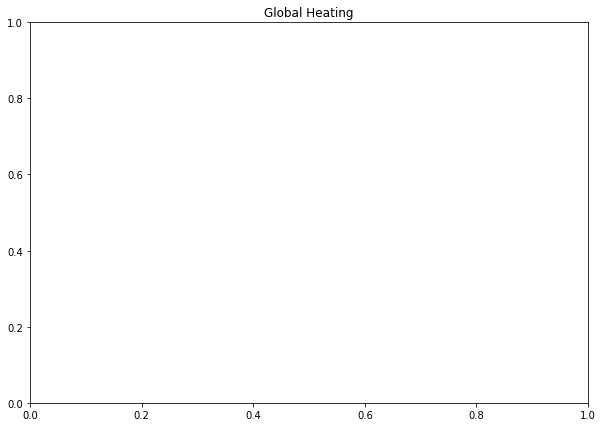

In [3]:
time_begin=datetime.datetime(2015,3,15,0,0,0)
# time_plot=time_begin+datetime.timedelta(minutes=maptime[timer])
time_p=[]
simtime=np.arange(5,1805,5)
for i in range(0,len(simtime)):
    time_plot=time_begin+datetime.timedelta(minutes=int(simtime[i]))
    time_p.append(time_plot)
# fig1 = go.Figure()
# fig1.add_trace(go.Scatter(x=gtime, y=QJ_GLOB[0:-1],name="Global JH",mode='lines',marker=dict(color='blue')))
# fig1.add_trace(go.Scatter(x=gtime, y=QA_GLOB[0:-1],name="Global AMIE",mode='lines',marker=dict(color='red'))) 
# fig1.add_trace(go.Scatter(x=gtime, y=QW_GLOB[0:-1],name="Global WIND",mode='lines',marker=dict(color='green'))) 
# fig1.add_trace(go.Scatter(x=gtime, y=QDTIN_GLOB[0:-1],name="Global qDTin",mode='lines',marker=dict(color='gold')))
# fig1.add_trace(go.Scatter(x=gtime, y=QDTIE_GLOB[0:-1],name="Global qDTen",mode='lines',marker=dict(color='hotpink')))
# fig1.add_trace(go.Scatter(x=gtime, y=QDTEN_GLOB[0:-1],name="Global qDTei",mode='lines',marker=dict(color='orange')))
# fig1.add_trace(go.Scatter(x=gtime, y=QFTIN_GLOB[0:-1],name="Global qFin",mode='lines',marker=dict(color='magenta')))
# # fig1.add_trace(go.Scatter(x=Joule1[0:-1], y=zg1,name="Joule",mode='lines',marker=dict(color='green')))
# # fig1.add_trace(go.Scatter(x=Frictional1[0:-1], y=zg1,name="Frictional",mode='lines',marker=dict(color='red')))

# fig1.update_layout(xaxis_showexponent='all', xaxis_exponentformat = 'power',
# yaxis_tick0 = 60,yaxis_dtick = 20,xaxis_title="$Time$",yaxis_title="GW",width=750,height=750,
# title={'text':'Global Heating Rates',
#        'y':0.9,'x':0.5,'xanchor': 'center','yanchor': 'top'})
# fig1.update_xaxes(showgrid=True, gridwidth=0.5, gridcolor='grey')
# fig1.update_yaxes(showgrid=True, gridwidth=0.5, gridcolor='grey')
# fig1.update_xaxes(showline=True, linewidth=2, linecolor='black', mirror=True)
# fig1.update_yaxes(showline=True, linewidth=2, linecolor='black', mirror=True)
# fig1.show()

fig1b, ax1b = plt.subplots(figsize=(10, 7))
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
ax1b.set_title('Global Heating')
#     ax1b.set_xscale('log')
ax1b.plot(time_p,QJ_GLOB,color='tab:blue', linewidth=2, label='qJH')
ax1b.plot(time_p,QA_GLOB,color='tab:red', linewidth=2, label='qConv')
ax1b.plot(time_p,QW_GLOB,color='tab:green', linewidth=2, label='qWind')
ax1b.plot(time_p,QDTIN_GLOB,color='tab:orange', linewidth=2, label='qDTin')
ax1b.grid(True, color="#93a1a1", alpha=0.3)
ax1b.minorticks_on()
plt.legend(loc='upper right')
# plt.ylim(100,400)
ax1b.set_xlabel("Time", labelpad=15, fontsize=12, color="#333533")
ax1b.set_ylabel("Heating (GW)", labelpad=15, fontsize=12, color="#333533")


plt.show()